Modified from the source article: https://github.com/eltontay/Ethereum-Fraud-Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_df = pd.read_csv('data/5_merging_dataset/dataset_main_full.csv')
transaction_df.head(10)

,Address,tag,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x370bfe9169535297d4bcaa476d059ecae37b292b,Fake_Phishing323048,1,2381.185185,0.000000,64292.000000,27,1,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,[],[]
1,0x35ebe18f14c6cce438298065628129c924c84eb8,Fake_Phishing323047,1,0.000000,30.830769,801.600000,0,26,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,[],[]
2,0x31eb0578b3544f8ca1f33d59a4c0352592c538fe,Fake_Phishing323046,1,241.387234,2207.700000,20176.000000,47,4,16,2,...,1.000000e-11,1.000000e+09,7.535200e+07,0,0,0,10,6,"['Polygon', 'ЕRC20...']",['Polygon']
3,0xcdb753fefb84dc8611eb340d75e12c3020bd0bed,Fake_Phishing323045,1,0.000000,17.100000,34.200000,0,2,1,1,...,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,[],[]
4,0xbfce1825c6da34a95906c9c5e4f45fdc464234d5,Fake_Phishing323044,1,33232.195238,38863.547222,932169.216667,7,18,0,9,...,1.513000e-10,1.513000e-10,1.513000e-10,0,0,0,1,1,['Tether USD'],['Tether USD']
5,0xd9b78d8346fa9b8235a5b1df0f08f66358d557bc,Fake_Phishing323043,1,9631.200000,3865.815385,108042.800000,6,13,0,6,...,1.447000e-15,2.471598e+04,3.531013e+03,0,0,0,5,18,['ЕTН...'],"['Dai Stablecoin', 'Tether USD']"
6,0x1bc31435d5817bcf614f5c11e80945777b723a59,Fake_Phishing323042,1,5595.733333,0.000000,16787.200000,3,1,0,1,...,1.990322e-08,1.990322e-08,1.990322e-08,0,0,0,1,2,['USDC'],['USDC']
7,0xb0d6716341dc3df12d2f102bfa18fbf41085a02f,Fake_Phishing323041,1,239.228571,61.000000,3471.200000,14,2,1,2,...,1.599268e+01,1.200000e+03,4.824448e+02,0,0,0,3,4,['Gemini AI'],['Gemini AI']
8,0xb954562066c71b3e6e7b2ac330b03c74c0dcd5ae,Fake_Phishing323040,1,0.000000,20.703413,126767.000000,0,6123,1,4691,...,1.366171e-01,5.658000e+02,2.209231e+01,0,0,0,1,32,['Gemini AI'],['Gemini AI']
9,0x5182a2ba45a598a038a284ee10dd678e655baf64,Fake_Phishing323039,1,13.040000,27.700000,120.600000,5,2,0,1,...,1.854300e+04,4.800000e+04,3.250860e+04,0,0,0,1,1,['Dai Stablecoin'],['Dai Stablecoin']


In [6]:
transaction_df['avg val sent'].unique()

array([0.00426403,        nan, 0.01185481, ..., 0.35917205, 0.34210988,
       0.03083625])

In [59]:
transaction_df.shape

(9841, 51)

In [29]:
list(transaction_df.columns)

['Address',
 'tag',
 'FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 'total ether balance',
 ' Total ERC20 tnxs',
 ' ERC20 total Ether received',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec contract addr',
 ' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between con

In [8]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399349 entries, 0 to 399348
Data columns (total 50 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Address                                               399349 non-null  object 
 1   tag                                                   399349 non-null  object 
 2   FLAG                                                  399349 non-null  int64  
 3   Avg min between sent tnx                              399349 non-null  float64
 4   Avg min between received tnx                          399349 non-null  float64
 5   Time Diff between first and last (Mins)               399349 non-null  float64
 6   Sent tnx                                              399349 non-null  int64  
 7   Received Tnx                                          399349 non-null  int64  
 8   Number of Created Contracts                 

In [9]:
transaction_df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,399349.000000,3.993490e+05,3.993490e+05,3.993490e+05,399349.000000,399349.000000,399349.000000,399349.000000,399349.000000,395573.000000,...,3.978300e+05,3.978300e+05,3.812020e+05,3.812020e+05,3.812020e+05,399349.0,399349.0,399349.0,399349.000000,399349.000000
mean,0.498544,8.698632e+03,9.347643e+03,2.592087e+05,145.319891,106.757688,0.211494,42.331522,26.611728,0.956493,...,4.798952e+55,4.030916e+54,3.037552e+53,5.441146e+54,4.978574e+53,0.0,0.0,0.0,7.853484,11.731496
std,0.499999,5.558002e+04,4.012606e+04,5.172225e+05,739.151530,817.439332,18.020201,405.732086,171.199112,68.926177,...,2.157073e+57,3.176244e+56,1.875432e+56,7.294937e+56,1.999440e+56,0.0,0.0,0.0,42.149304,62.113682
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,4.000000e-01,0.000000e+00,6.000000e-01,1.000000,1.000000,0.000000,1.000000,1.000000,0.001899,...,1.900000e-14,8.333333e-15,0.000000e+00,1.600000e-14,1.551575e-14,0.0,0.0,0.0,1.000000,1.000000
50%,0.000000,1.348000e+01,0.000000e+00,5.831000e+03,2.000000,1.000000,0.000000,1.000000,1.000000,0.002633,...,2.244600e-13,1.000000e-13,5.000000e-14,1.414950e-13,1.220000e-13,0.0,0.0,0.0,1.000000,1.000000
75%,1.000000,2.340480e+03,2.581726e+03,2.421360e+05,24.000000,9.000000,0.000000,4.000000,6.000000,0.010000,...,3.200000e+03,5.934624e+02,3.400000e-11,4.700000e+02,1.000000e+02,0.0,0.0,0.0,2.000000,3.000000
max,1.000000,4.460115e+06,3.242715e+06,4.523886e+06,10000.000000,10000.000000,9947.000000,9998.000000,9994.000000,25533.614329,...,1.157921e+59,1.130992e+59,1.157921e+59,1.157921e+59,1.157921e+59,0.0,0.0,0.0,2606.000000,4737.000000


In [10]:
transaction_df.nunique()

Address                                                 399157
tag                                                     199078
FLAG                                                         2
Avg min between sent tnx                                185070
Avg min between received tnx                            164973
Time Diff between first and last (Mins)                 204464
Sent tnx                                                  5445
Received Tnx                                              3937
Number of Created Contracts                                116
Unique Received From Addresses                            3701
Unique Sent To Addresses                                  1865
min value received                                      194328
max value received                                      212447
avg val received                                        262374
min val sent                                             38407
max val sent                                           

(158716, 50)

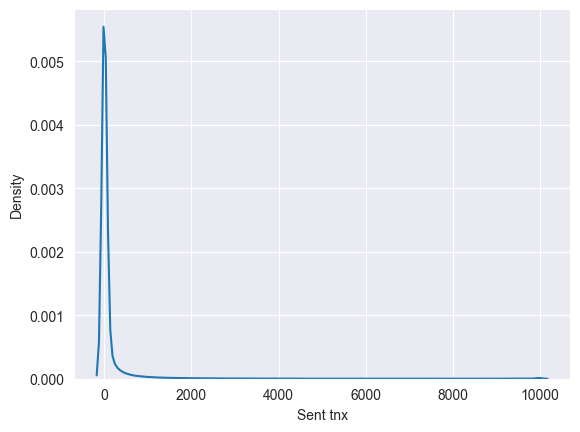

In [11]:
sns.kdeplot(transaction_df['Sent tnx'])
transaction_df[(transaction_df['Sent tnx'] <2) & (transaction_df['FLAG'] == 1)].shape

### Cleaning Dataset

In [4]:
transaction_df = transaction_df.fillna(0)

# Removing columns that are empty
empty_columns = [' ERC20 uniq sent addr.1', 
                 ' ERC20 avg time between rec 2 tnx',
                 ' ERC20 avg time between contract tnx', ' ERC20 max val sent contract', ' ERC20 min val sent contract', ' ERC20 avg val sent contract']
transaction_df = transaction_df.drop(columns = empty_columns)


### Conducting Correlation Analysis for Feature Reduction

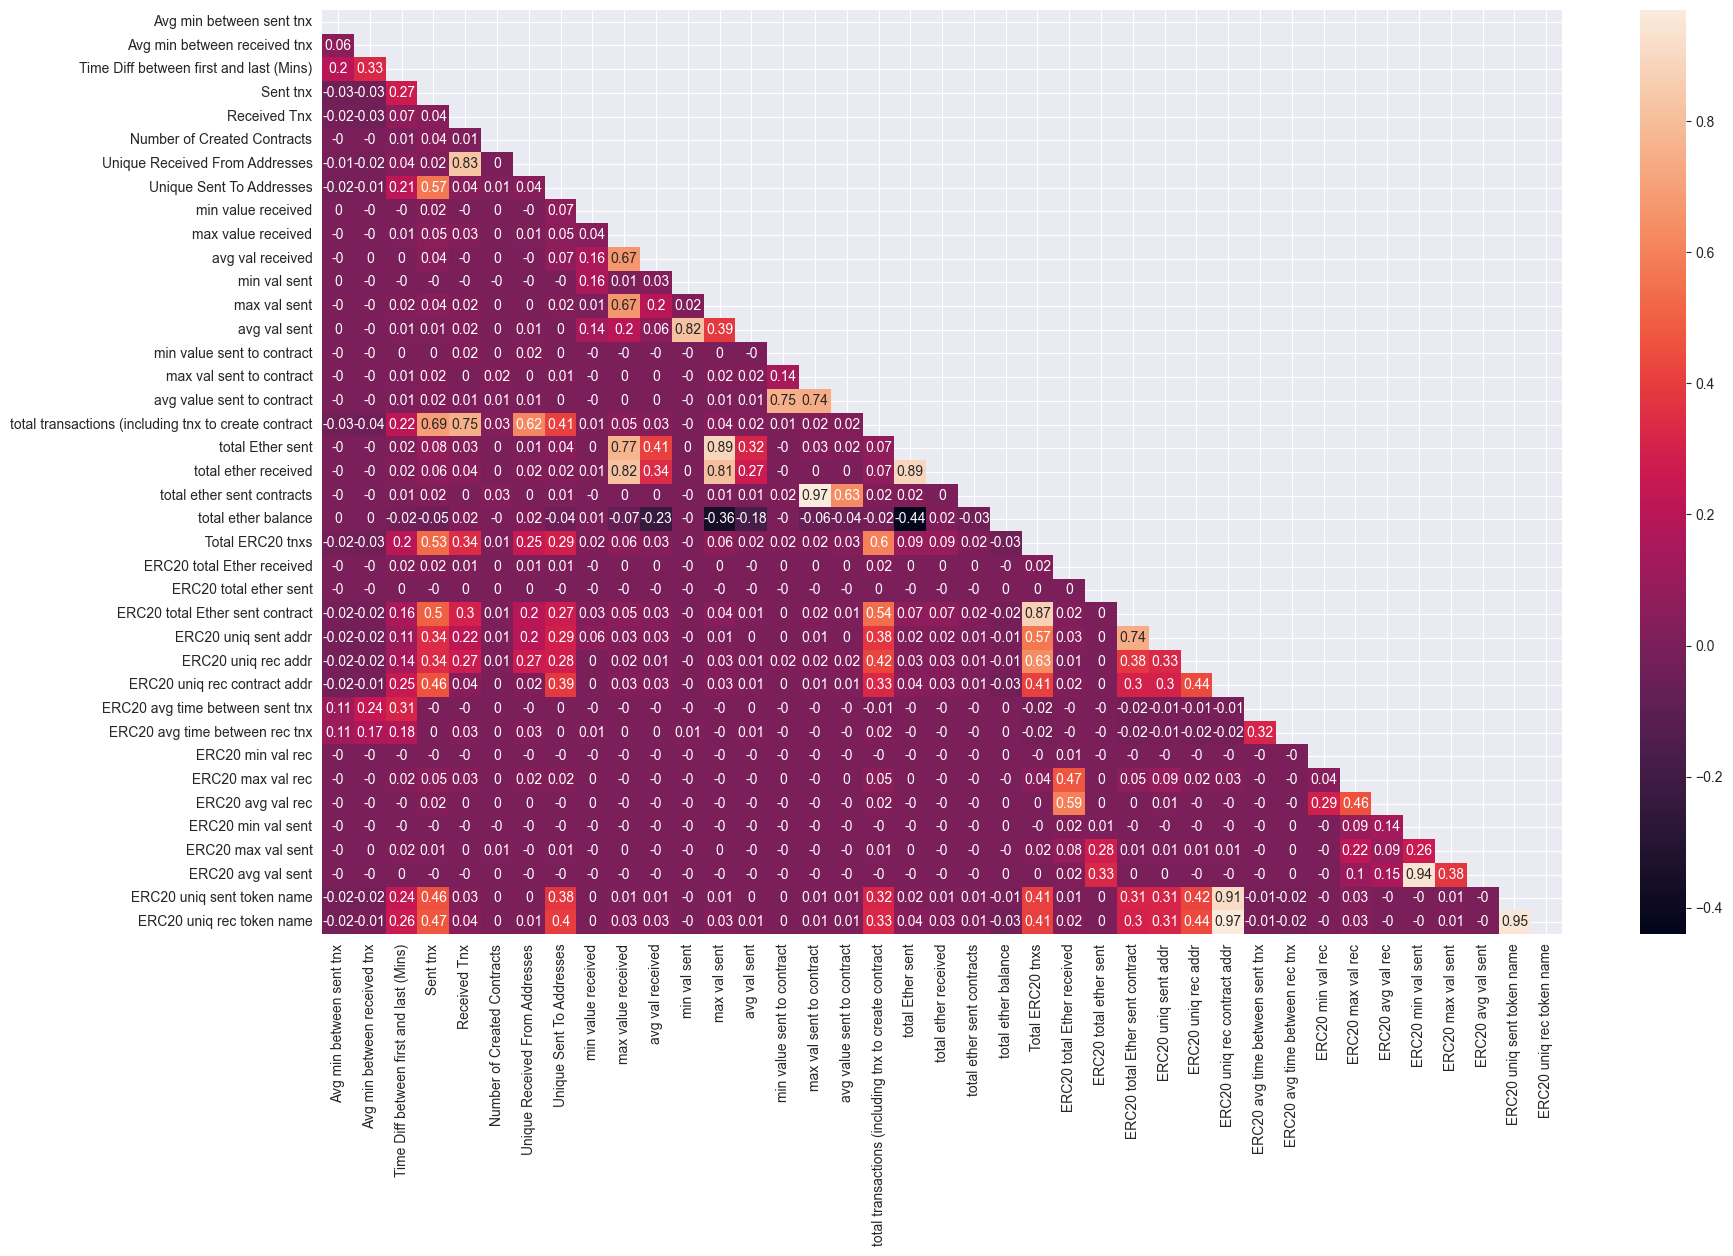

In [5]:
# Plotting Correlation Matrix to see understand which features are highly correlated 
numeric_transaction_df = feature_transaction_df = transaction_df.drop(columns = ['FLAG', 'tag']).select_dtypes(include=np.number) #
corr_matrix = numeric_transaction_df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, annot = True)

# corr_matrix.style.background_gradient(cmap='coolwarm')
plt.show()

In [18]:
# Finding correlations that are above 0.7
correlation_threshold = 0.7
reduced_corr_matrix = corr_matrix.mask(mask)
corr_matrix_unstacked = reduced_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= correlation_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
9,max val sent to contract,total ether sent contracts,0.97
14,ERC20 uniq rec contract addr,ERC20 uniq rec token name,0.97
16,ERC20 uniq sent token name,ERC20 uniq rec token name,0.95
15,ERC20 min val sent,ERC20 avg val sent,0.94
13,ERC20 uniq rec contract addr,ERC20 uniq sent token name,0.91
5,max val sent,total Ether sent,0.89
10,total Ether sent,total ether received,0.89
11,Total ERC20 tnxs,ERC20 total Ether sent contract,0.87
0,Received Tnx,Unique Received From Addresses,0.83
4,min val sent,avg val sent,0.82


In [20]:
# Doing Dimensionality Reduction 

erc20_dim_red_df = transaction_df[
    ['max val sent to contract', ' ERC20 uniq rec contract addr',
     ' ERC20 uniq sent token name',
     ' ERC20 min val sent', ' ERC20 uniq rec contract addr',
     'total Ether sent', ' Total ERC20 tnxs', 'Received Tnx', 'avg val sent',
     
     'Number of Created Contracts', 'total transactions (including tnx to create contract'
     ]
]
                                   

erc20_dim_red_df

,max val sent to contract,ERC20 uniq rec contract addr,ERC20 uniq sent token name,ERC20 min val sent,ERC20 uniq rec contract addr,total Ether sent,Total ERC20 tnxs,Received Tnx,avg val sent,Number of Created Contracts,total transactions (including tnx to create contract
0,0.0,0,0,0.000000e+00,0,0.115129,0,1,0.004264,1,28
1,0.0,0,0,0.000000e+00,0,0.000000,0,26,0.000000,1,26
2,0.0,16,10,1.000000e-11,16,0.557176,56,4,0.011855,16,51
3,0.0,0,0,0.000000e+00,0,0.000000,0,2,0.000000,1,2
4,0.0,1,1,1.513000e-10,1,1.194941,4,18,0.170706,0,25
...,...,...,...,...,...,...,...,...,...,...,...
399344,0.0,0,0,0.000000e+00,0,2.394769,0,7,0.342110,0,14
399345,0.0,0,0,0.000000e+00,0,0.555053,0,1,0.030836,11,19
399346,0.0,1,1,9.271443e-10,1,0.000000,6,3,0.000000,0,6
399347,0.0,0,0,0.000000e+00,0,14.690400,0,3,4.896800,0,6


In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_erc20_data = scaler.fit_transform(erc20_dim_red_df)


pca_2 = PCA(n_components=2)
pca_2_features = pca_2.fit_transform(scaled_erc20_data)


In [23]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(pca_2_features)
tsne_features

array([[ -0.67524713,  -9.194714  ],
       [  0.11345492, -14.647333  ],
       [ -1.7262006 ,  10.213441  ],
       ...,
       [ -6.326409  ,   0.1986768 ],
       [ -6.0287223 , -10.021228  ],
       [  5.7520084 ,  -7.418213  ]], dtype=float32)

In [24]:
tsne_features[1:4, :]

array([[  0.11345492, -14.647333  ],
       [ -1.7262006 ,  10.213441  ],
       [-10.193455  ,  -9.727073  ]], dtype=float32)

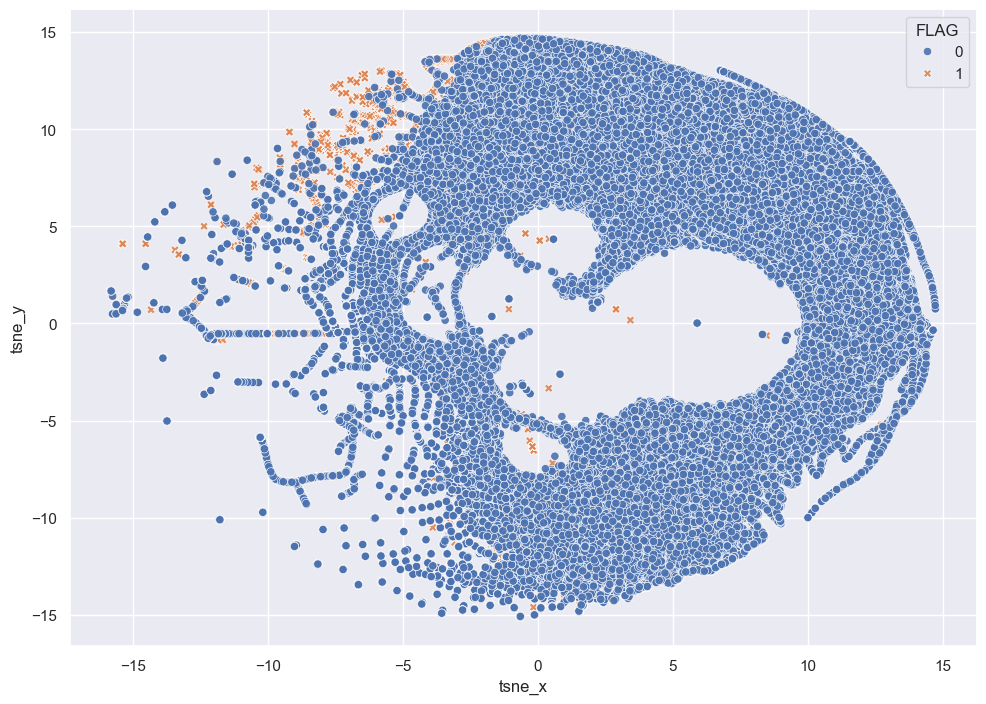

In [28]:
import seaborn as sns

# transaction_df['tsne_x'] = tsne_features[:,0]
# transaction_df['tsne_y'] = tsne_features[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='tsne_x',y='tsne_y',data=transaction_df,alpha=0.9,hue='FLAG',style='FLAG')
plt.show()